In [18]:
import time
import datetime
import board
import busio
import numpy as np
import adafruit_mlx90640
import matplotlib.pyplot as plt
from IPython import display


i2c = busio.I2C(board.SCL, board.SDA)

mlx = adafruit_mlx90640.MLX90640(i2c)
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_8_HZ

_start = time.time()
# _end = time.time()

frame = np.zeros(768)

while True:
    try:
        _start = time.time()
        mlx.getFrame(frame)
    except ValueError as e:
        print(e)
        continue

    res = np.array(frame).reshape((24,32))
#     res = np.around(res, 1)
    seconds = time.time() - _start
    fps = 1 / seconds
#     print(time.time(), 'FPS: {}'.format(round(fps, 1)))
    local_time = datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')
    plt.title('{} FPS: {}'.format(local_time, round(fps, 1)))
    plt.imshow(res)
    plt.show()
    display.clear_output(wait=True)

KeyboardInterrupt: 

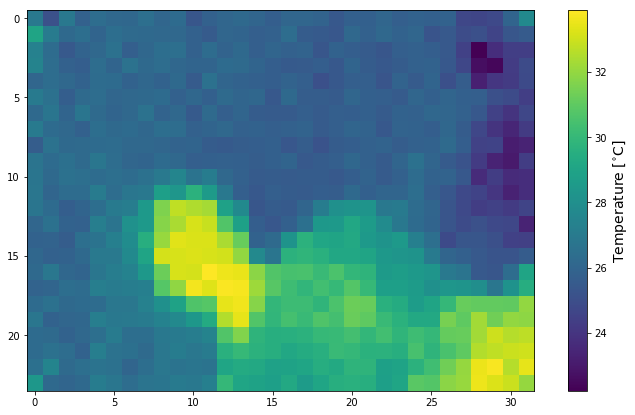

Sample Rate: 0.1fps
Sample Rate: 0.1fps
Sample Rate: 0.1fps


SystemError: <built-in method write of _io.BufferedWriter object at 0x6ec22030> returned a result with an error set

In [6]:
##########################################
# MLX90640 Thermal Camera w Raspberry Pi
# -- 2Hz Sampling with Simple Routine
##########################################
#
import time,board,busio
import numpy as np
import adafruit_mlx90640
import matplotlib.pyplot as plt

i2c = busio.I2C(board.SCL, board.SDA, frequency=400000) # setup I2C
mlx = adafruit_mlx90640.MLX90640(i2c) # begin MLX90640 with I2C comm
mlx.refresh_rate = adafruit_mlx90640.RefreshRate.REFRESH_8_HZ # set refresh rate
mlx_shape = (24,32)

# setup the figure for plotting
plt.ion() # enables interactive plotting
fig,ax = plt.subplots(figsize=(12,7))
therm1 = ax.imshow(np.zeros(mlx_shape),vmin=0,vmax=60) #start plot with zeros
cbar = fig.colorbar(therm1) # setup colorbar for temps
cbar.set_label('Temperature [$^{\circ}$C]',fontsize=14) # colorbar label

frame = np.zeros((24*32,)) # setup array for storing all 768 temperatures
t_array = []
while True:
    t1 = time.monotonic()
    try:
        mlx.getFrame(frame) # read MLX temperatures into frame var
        data_array = (np.reshape(frame,mlx_shape)) # reshape to 24x32
        therm1.set_data(np.fliplr(data_array)) # flip left to right
        therm1.set_clim(vmin=np.min(data_array),vmax=np.max(data_array)) # set bounds
        cbar.on_mappable_changed(therm1) # update colorbar range
        plt.pause(0.001) # required
        fig.savefig('mlx90640_test_fliplr.png',dpi=300,facecolor='#FCFCFC',
                    bbox_inches='tight') # comment out to speed up
        t_array.append(time.monotonic()-t1)
        print('Sample Rate: {0:2.1f}fps'.format(len(t_array)/np.sum(t_array)))
    except ValueError:
        continue # if error, just read again